In [64]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [65]:
plt.style.use('ggplot')
%matplotlib inline

In [66]:
df = pd.read_csv('data/concatenated_summaries.csv')
df['start_date'] = df['start_date'].astype('datetime64[ns]')

In [89]:
print df['start_date']

0    2012-10-01 05:00:00
1    2013-01-01 06:00:00
2    2013-04-01 05:00:00
3    2013-07-01 05:00:00
4    2013-10-01 05:00:00
5    2014-01-01 06:00:00
6    2014-04-01 05:00:00
7    2014-07-01 05:00:00
8    2014-10-01 05:00:00
9    2015-01-01 06:00:00
10   2008-07-01 05:00:00
11   2008-10-01 05:00:00
12   2009-01-01 06:00:00
13   2009-04-01 05:00:00
14   2009-07-01 05:00:00
...
82   2011-07-01 05:00:00
83   2011-10-01 05:00:00
84   2012-01-01 06:00:00
85   2012-04-01 05:00:00
86   2012-07-01 05:00:00
87   2012-10-01 05:00:00
88   2013-01-01 06:00:00
89   2013-04-01 05:00:00
90   2013-07-01 05:00:00
91   2013-10-01 05:00:00
92   2014-01-01 06:00:00
93   2014-04-01 05:00:00
94   2014-07-01 05:00:00
95   2014-10-01 05:00:00
96   2015-01-01 06:00:00
Name: start_date, Length: 97, dtype: datetime64[ns]


In [67]:
df.describe()

,num_files,max_block_complexity,min_block_complexity,mean_block_complexity,max_file_complexity,min_file_complexity,mean_file_complexity,loc,lloc,sloc,comments,multi,blank,min_mi,max_mi,mean_mi,total_posts,answered,unanswered,total_answers
count,97.000000,97.000000,97,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,486.288660,56.154639,1,2.555006,368.123711,1.371134,39.317128,62400.381443,33487.711340,53989.154639,5646.164948,7338.659794,8411.226804,8.870633,99.695061,76.263581,1069.134021,640.597938,428.536082,1518.329897
std,691.831837,35.789704,0,0.614549,171.972700,1.878162,14.907177,79482.012026,44315.617652,68133.008681,6112.499301,8447.801212,11499.790870,14.644821,2.192718,8.606652,1778.530554,1018.279714,807.083317,2421.639010
min,1.000000,1.000000,1,1.000000,1.000000,0.000000,1.000000,48.000000,11.000000,40.000000,7.000000,0.000000,8.000000,0.000000,81.140629,59.193518,1.000000,0.000000,0.000000,0.000000
25%,67.000000,28.000000,1,2.031101,192.000000,1.000000,28.463677,12706.000000,6086.000000,10826.000000,952.000000,1664.000000,1629.000000,0.000000,100.000000,67.544070,52.000000,35.000000,14.000000,69.000000
50%,83.000000,45.000000,1,2.378378,412.000000,1.000000,33.091597,18377.000000,9547.000000,16076.000000,2750.000000,2547.000000,2301.000000,0.000000,100.000000,79.997474,142.000000,86.000000,59.000000,185.000000
75%,973.000000,74.000000,1,2.883202,475.000000,1.000000,53.100000,109072.000000,50796.000000,98189.000000,8528.000000,16976.000000,10883.000000,17.984090,100.000000,83.767762,809.000000,477.000000,356.000000,1272.000000
max,2031.000000,139.000000,1,4.327952,679.000000,19.000000,73.638889,269864.000000,154388.000000,227437.000000,19971.000000,25129.000000,42427.000000,89.280254,100.000000,89.280254,5943.000000,3110.000000,3341.000000,7531.000000


In [68]:
print df['num_files'].sum()
print df['num_files'].median()

47170
83.0


In [69]:
print df['loc'].sum()
print df['loc'].median()

6052837
18377.0


In [70]:
print df['mean_file_complexity'].median()
print df['mean_mi'].median()

33.0915966387
79.997473773


## Plot file complexity behavior

In [71]:
df.groupby('project')['mean_file_complexity'].median()

project
ansible     39.164141
django      29.064057
flask       27.912281
requests    33.132075
tornado     60.440000
Name: mean_file_complexity, dtype: float64

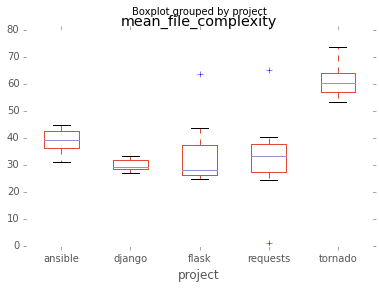

In [96]:
%matplotlib inline
plot = df.boxplot(column='mean_file_complexity', by='project')
fig = plot.get_figure()
fig.savefig('mfc_by_project.png')

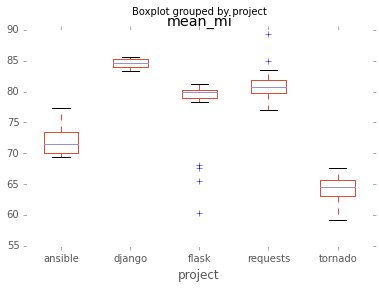

In [97]:
plot = df.boxplot(column='mean_mi', by='project')
fig = plot.get_figure()
fig.savefig('mean_mi_by_project.png')

(array([  1.,   0.,   0.,  35.,  22.,  13.,   1.,  11.,   9.,   5.]),
 array([  1.        ,   8.26388889,  15.52777778,  22.79166667,
         30.05555556,  37.31944444,  44.58333333,  51.84722222,
         59.11111111,  66.375     ,  73.63888889]),
 <a list of 10 Patch objects>)

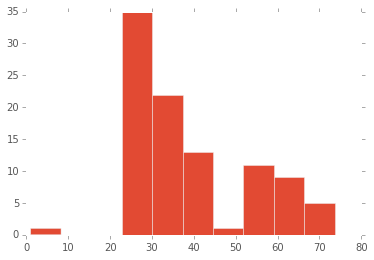

In [74]:
fig = plt.pyplot.figure()
ax = fig.add_subplot(111)
ax.hist(df['mean_file_complexity'], bins=10, range=(df['mean_file_complexity'].min(), df['mean_file_complexity'].max()))

(array([  6.,   7.,  14.,   5.,   3.,   2.,  18.,  11.,  30.,   1.]),
 array([ 59.1935179 ,  62.20219154,  65.21086517,  68.2195388 ,
         71.22821244,  74.23688607,  77.2455597 ,  80.25423334,
         83.26290697,  86.2715806 ,  89.28025424]),
 <a list of 10 Patch objects>)

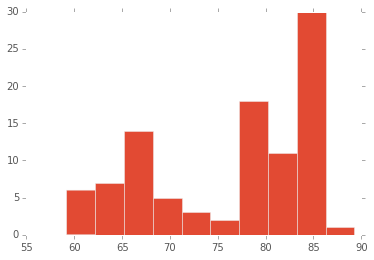

In [75]:
fig = plt.pyplot.figure()
ax = fig.add_subplot(111)
ax.hist(df['mean_mi'], bins=10, range=(df['mean_mi'].min(), df['mean_mi'].max()))

(array([  1.,   0.,   9.,  36.,  17.,  13.,  11.,   2.,   3.,   5.]),
 array([ 1.        ,  1.33279516,  1.66559031,  1.99838547,  2.33118063,
         2.66397578,  2.99677094,  3.32956609,  3.66236125,  3.99515641,
         4.32795156]),
 <a list of 10 Patch objects>)

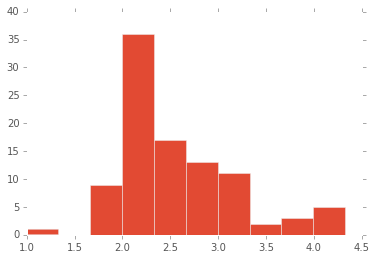

In [76]:
fig = plt.pyplot.figure()
ax = fig.add_subplot(111)
ax.hist(df['mean_block_complexity'], bins=10, range=(df['mean_block_complexity'].min(), df['mean_block_complexity'].max()))

## Look at each project's AR

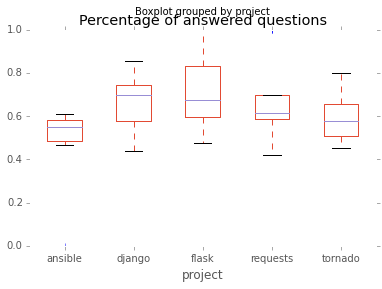

In [166]:
df['answered_ratio'] = df['answered']/df['total_posts']
df['unanswered_ratio'] = df['unanswered']/df['total_posts']
df['Percentage of answered questions'] = df['answered_ratio']
df.boxplot(column='Percentage of answered questions', by='project')

In [167]:
print df.groupby('project')['answered_ratio'].describe()

project        
ansible   count    10.000000
          mean      0.491021
          std       0.179525
          min       0.000000
          25%       0.483025
          50%       0.550926
          75%       0.580106
          max       0.610169
django    count    27.000000
          mean      0.662975
          std       0.120067
          min       0.437826
          25%       0.576358
          50%       0.698074
          75%       0.745541
          max       0.855072
flask     count    20.000000
          mean      0.701129
          std       0.151588
          min       0.476048
          25%       0.596836
          50%       0.675788
          75%       0.831573
          max       1.000000
requests  count    17.000000
          mean      0.667544
          std       0.171736
          min       0.420635
          25%       0.586207
          50%       0.617021
          75%       0.698630
          max       1.000000
tornado   count    23.000000
          mean      0.59086

In [170]:
for i, grp in df.groupby('project'):
    print i, grp['answered_ratio'].median()


ansible 0.550925925926
django 0.698073919833
flask 0.675788409819
requests 0.617021276596
tornado 0.579365079365


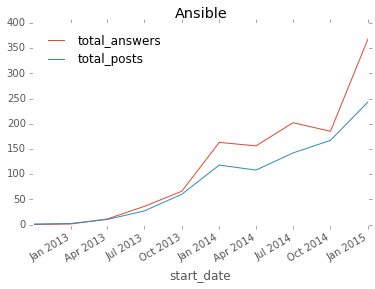

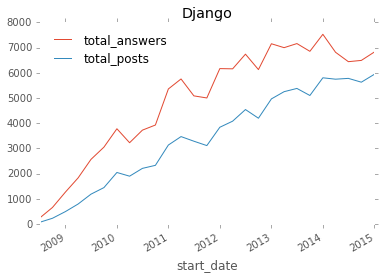

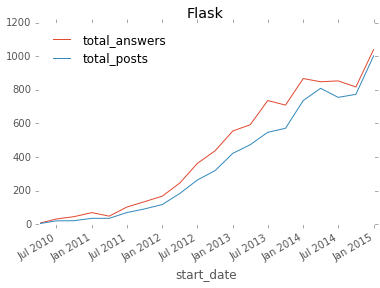

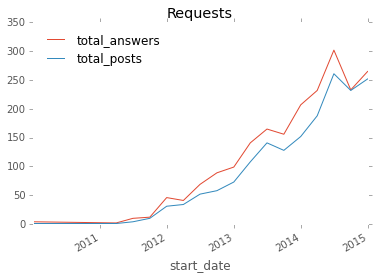

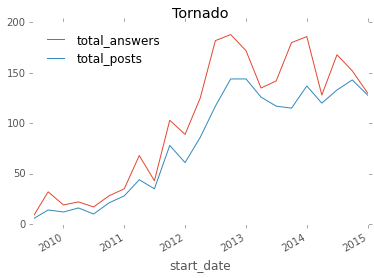

In [153]:
for i, grp in df.groupby('project'):
    grp.plot(x='start_date', y=['total_answers', 'total_posts'], legend=True, title=i.title())

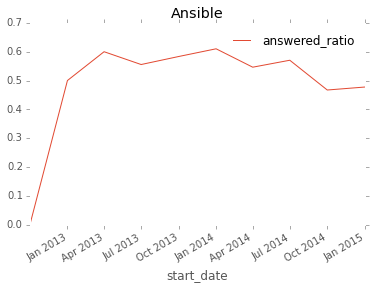

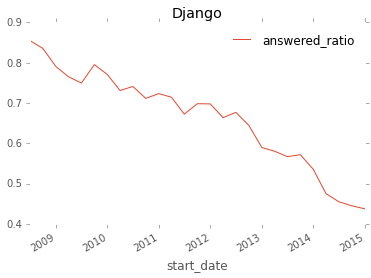

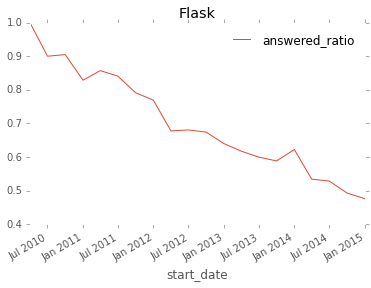

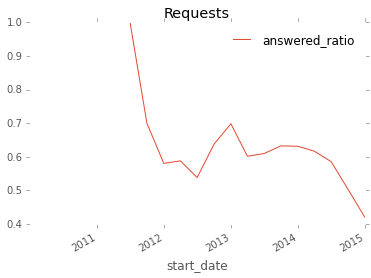

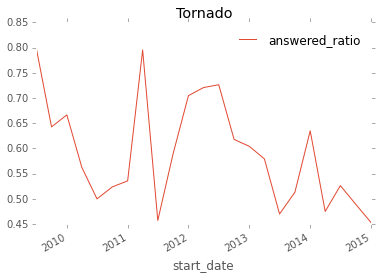

In [161]:
for i, grp in df.groupby('project'):
    grp.plot(x='start_date', y=['answered_ratio'], legend=True, title=i.title())

## Determine correlations

MFC vs. AR:

In [173]:
for i, grp in df.groupby('project'):
    print i, grp['mean_file_complexity'].corr(grp['answered_ratio'])

 ansible -0.099136104697
django -0.649001227681
flask 0.194862965291
requests -0.0301916702327
tornado 0.0487468800222


In [175]:
for i, grp in df.groupby('project'):
    print i, grp['mean_mi'].corr(grp['answered_ratio'])

ansible 0.179463101003
django 0.436062508411
flask -0.223827200507
requests 0.558362914903
tornado -0.0727942130473


In [176]:
for i, grp in df.groupby('project'):
    print i, grp['mean_file_complexity'].corr(grp['mean_mi'])

ansible -0.797537419426
django -0.763174836452
flask -0.689677901235
requests -0.710694382614
tornado -0.959242525295


In [177]:
df['mean_file_complexity'].corr(df['mean_mi'])

-0.88673341577894671

In [178]:
df['mean_file_complexity'].corr(df['answered_ratio'])

-0.19356475593806652

In [179]:
df['mean_mi'].corr(df['answered_ratio'])

0.24179571176376624

In [79]:
df.groupby('project')['loc'].corr(df['mean_file_complexity'])

project
ansible     0.444715
django      0.447454
flask      -0.433149
requests    0.046148
tornado    -0.577887
Name: loc, dtype: float64

How does LLOC stack up against MFC?

In [80]:
df.groupby('project')['lloc'].corr(df['mean_file_complexity'])

project
ansible     0.485830
django      0.453809
flask      -0.451892
requests    0.137172
tornado    -0.556506
Name: lloc, dtype: float64

One significant difference: requests.

In [82]:
df.groupby('project')['loc'].corr(df['mean_mi'])

project
ansible     0.151654
django     -0.239133
flask       0.476017
requests   -0.230063
tornado     0.632813
Name: loc, dtype: float64

In [83]:
df.groupby('project')['lloc'].corr(df['mean_mi'])

project
ansible     0.103862
django     -0.259335
flask       0.479459
requests   -0.381286
tornado     0.607735
Name: lloc, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113bb8b50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x115694190>]], dtype=object)

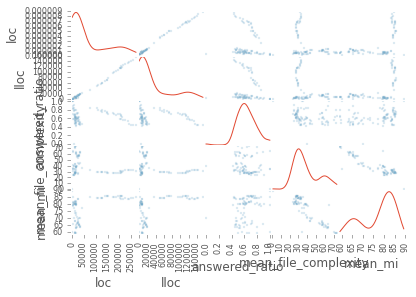

In [84]:
pd.scatter_matrix(df.loc[:, ['loc', 'lloc', 'answered_ratio', 'mean_file_complexity', 'mean_mi']], alpha=0.2, diagonal='kde')

## Get summary statistics for report

In [85]:
df.loc[:, ['project', 'num_files', 'loc', 'mean_file_complexity', 'mean_block_complexity', 'answered_ratio', 'mean_mi', 'total_posts', 'total_answers']].groupby('project').describe()

answered_ratio            loc  mean_block_complexity  \
project                                                                
ansible  count       10.000000      10.000000              10.000000   
         mean         0.491021   21742.700000               3.935020   
         std          0.179525   11286.569719               0.282139   
         min          0.000000    6998.000000               3.399657   
         25%          0.483025   13464.000000               3.782560   
         50%          0.550926   19488.000000               3.975717   
         75%          0.580106   29024.500000               4.140019   
         max          0.610169   43415.000000               4.327952   
django   count       27.000000      27.000000              27.000000   
         mean         0.662975  181771.222222               2.150959   
         std          0.120067   50992.463147               0.218242   
         min          0.437826   76788.000000               1.923877   
         25%          0.576358  142775.500000               1.991908   
         50%          0.698074  193105.000000               2.029509   
         75%          0.745541  213487.000000               2.309607   
         max          0.855072  269864.000000               2.761708   
flask    count       20.000000      20.000000              20.000000   
         mean         0.701129    9730.350000               2.486558   
         std          0.151588    3600.798337               0.432671   
         min          0.476048     614.000000               1.980392   
         25%          0.596836    8660.500000               2.201034   
         50%          0.675788   10807.000000               2.262271   
         75%          0.831573   12471.500000               3.017050   
         max          1.000000   13453.000000               3.187713   
requests count       17.000000      17.000000              17.000000   
         mean         0.667544   12720.058824               2.581426   
         std          0.171736    7764.985894               0.437956   
         min          0.420635      48.000000               1.000000   
         25%          0.586207    5804.000000               2.584158   
         50%          0.617021   14960.000000               2.661386   
         75%          0.698630   17460.000000               2.851385   
         max          1.000000   25003.000000               2.915374   
tornado  count       23.000000      23.000000              23.000000   
         mean         0.590867   22466.913043               2.469308   
         std          0.106029    7144.862897               0.423679   
         min          0.453125   12935.000000               2.002480   
         25%          0.506522   16469.000000               2.026225   
         50%          0.579365   22401.000000               2.383483   
         75%          0.654762   27934.000000               2.912030   
         max          0.800000   34515.000000               3.049198   

                mean_file_complexity    mean_mi    num_files  total_answers  \
project                                                                       
ansible  count             10.000000  10.000000    10.000000      10.000000   
         mean              38.829225  72.106512   126.300000     118.800000   
         std                4.616415   2.593274    66.856480     118.320469   
         min               30.968750  69.312889    44.000000       0.000000   
         25%               36.058854  70.073501    87.500000      17.250000   
         50%               39.164141  71.553845   111.500000     111.000000   
         75%               42.563307  73.451918   148.000000     179.500000   
         max               44.858108  77.282071   286.000000     368.000000   
django   count             27.000000  27.000000    27.000000      27.000000   
         mean              29.711142  84.512873  1552.740741    4926.074074   
         std                2.003180   0.69

In [86]:
df.loc[:, ['project', 'loc', 'mean_file_complexity', 'mean_block_complexity', 'answered_ratio', 'mean_mi', 'total_posts', 'total_answers']].describe()

,loc,mean_file_complexity,mean_block_complexity,answered_ratio,mean_mi,total_posts,total_answers
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,62400.381443,39.317128,2.555006,0.636818,76.263581,1069.134021,1518.329897
std,79482.012026,14.907177,0.614549,0.151351,8.606652,1778.530554,2421.639010
min,48.000000,1.000000,1.000000,0.000000,59.193518,1.000000,0.000000
25%,12706.000000,28.463677,2.031101,0.535745,67.544070,52.000000,69.000000
50%,18377.000000,33.091597,2.378378,0.617336,79.997474,142.000000,185.000000
75%,109072.000000,53.100000,2.883202,0.720930,83.767762,809.000000,1272.000000
max,269864.000000,73.638889,4.327952,1.000000,89.280254,5943.000000,7531.000000


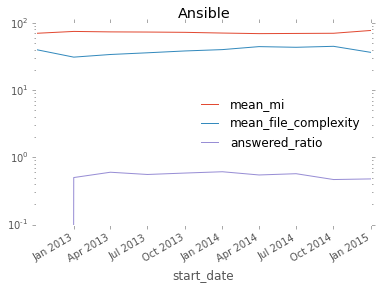

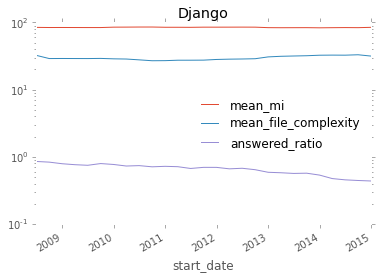

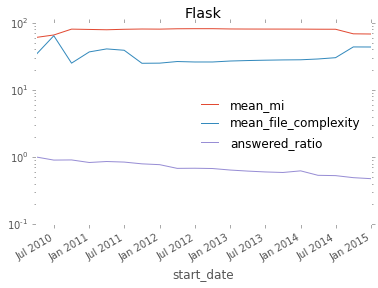

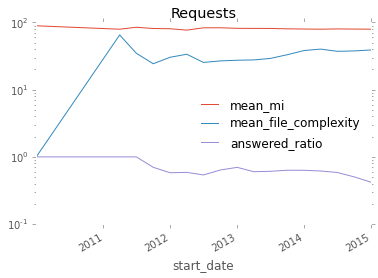

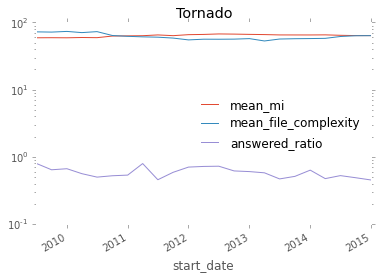

In [183]:
for i, grp in df.groupby('project'):
    grp.plot(x='start_date', y=['mean_mi', 'mean_file_complexity', 'answered_ratio'], logy=True, legend=True, title=i.title())

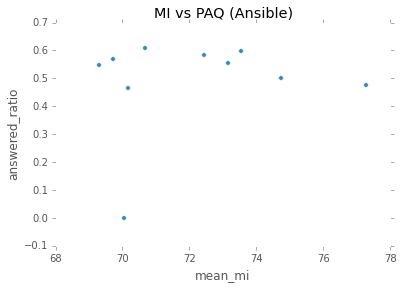

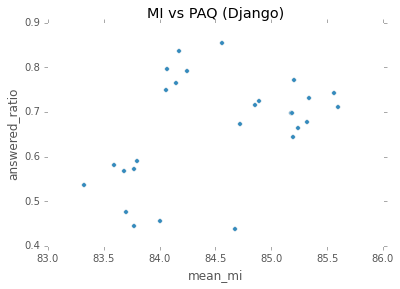

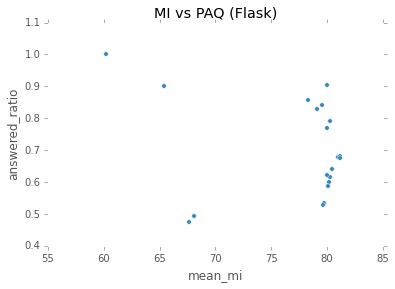

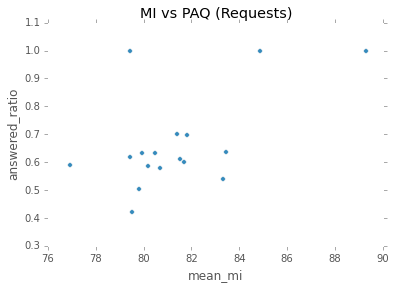

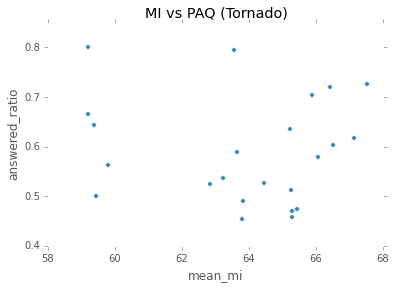

In [195]:
for i, grp in df.groupby('project'):
    grp.plot(x='mean_mi', y='answered_ratio', kind='scatter', legend=True, title="MI vs PAQ ({})".format(i.title()))

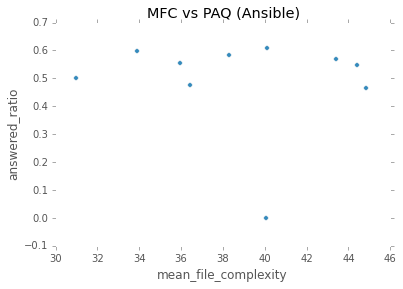

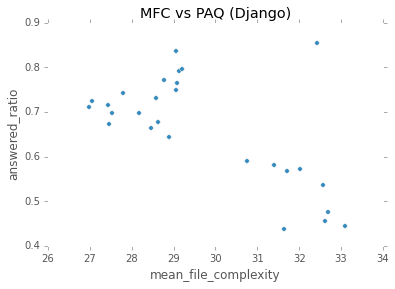

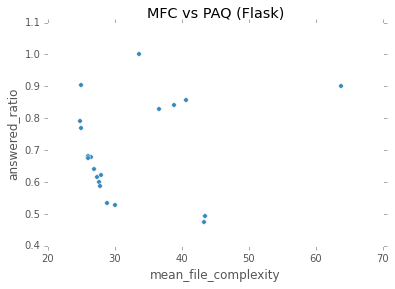

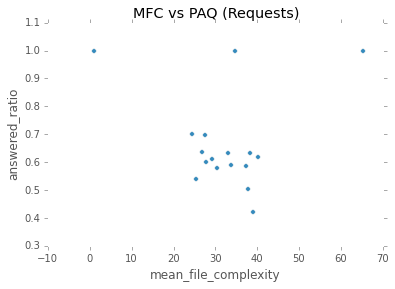

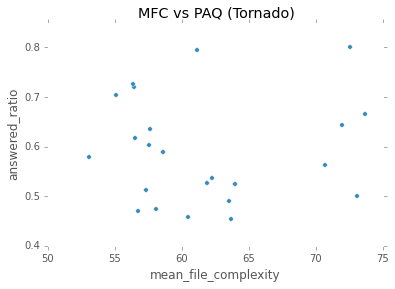

In [196]:
for i, grp in df.groupby('project'):
    grp.plot(x='mean_file_complexity', y='answered_ratio', kind='scatter', legend=True, title="MFC vs PAQ ({})".format(i.title()))

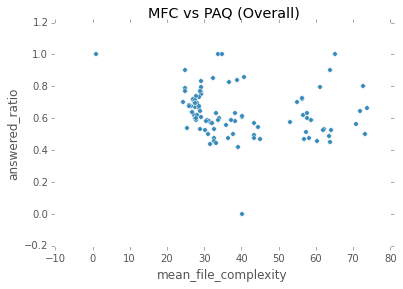

In [197]:
df.plot(x='mean_file_complexity', y='answered_ratio', kind='scatter', legend=True, title='MFC vs PAQ (Overall)')

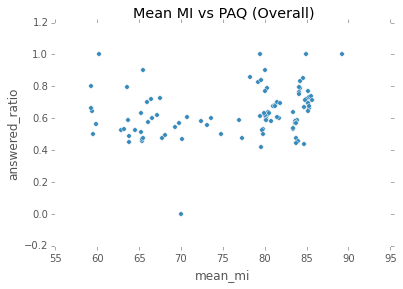

In [198]:
df.plot(x='mean_mi', y='answered_ratio', kind='scatter', legend=True, title='Mean MI vs PAQ (Overall)')

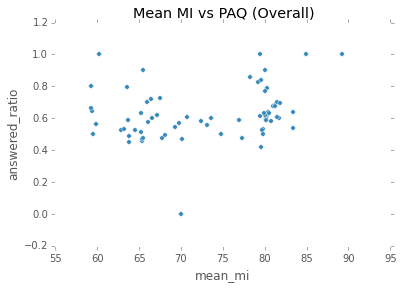

In [201]:
idx = df['project'].isin(['django'])
df[~idx].plot(x='mean_mi', y='answered_ratio', kind='scatter', legend=True, title='Mean MI vs PAQ (Overall)')

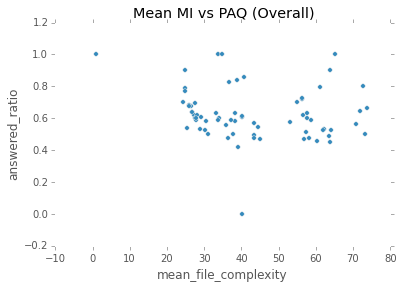

In [202]:
idx = df['project'].isin(['django'])
df[~idx].plot(x='mean_file_complexity', y='answered_ratio', kind='scatter', legend=True, title='Mean MI vs PAQ (Overall)')